In [1]:
from bindenergypredict import BindEnergyPredict

import pandas as pd
import torch
import torch.nn as nn
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv(r"D:\chongzhuang\huinaibingLinux\python_code\dataAnalysis\DATA_FILES\binding_energy_data_2020.csv")

torch.Size([2471, 2])
torch.Size([2471, 1])


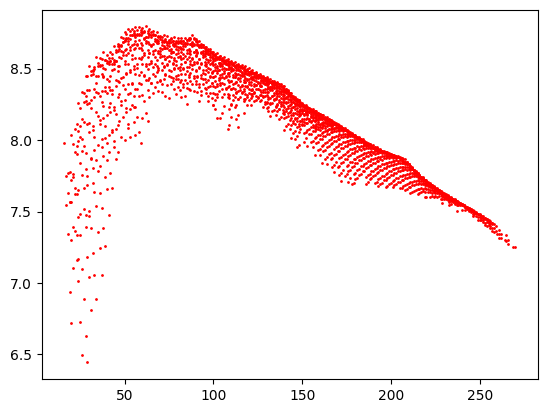

In [3]:
z_datas = np.array(df["Z"]).reshape(-1, 1)
n_datas = np.array(df["N"]).reshape(-1, 1)
a_datas = np.array(df["A"]).reshape(-1, 1)

x_datas = np.concatenate((z_datas, n_datas), axis=1)
y_datas = (np.array(df["binding_energy"]).reshape(-1, 1)) / a_datas

import matplotlib.pyplot as plt
plt.plot(a_datas, np.abs(y_datas), "ro", ms=1)

x_datas = torch.from_numpy(x_datas).float().to(device)
y_datas = torch.from_numpy(y_datas).float().to(device)
print(x_datas.shape)
print(y_datas.shape)

In [4]:
n_iters = 1000
lr = 0.001
model1 = BindEnergyPredict(activation=nn.ReLU())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=lr)
losses1 = []

device: cuda


# 批处理，batchSize=10

In [5]:
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
 
train_dataset = TensorDataset(x_datas, torch.abs(y_datas))
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [6]:
for _ in tqdm(range(n_iters)):
    loss_one_iter = 0
    # 抽样10个
    for batch in train_loader:
        inputs, target = batch
        # print(batch)
        optimizer.zero_grad()
        y_pred = model1(inputs)
        loss = loss_func(y_pred, target)
        
        # print(y_pred)
        # print(target)
        # print(loss.item())
        
        loss.backward()
        optimizer.step()
        loss_one_iter += loss.item()
    losses1.append(loss_one_iter)

100%|██████████| 1000/1000 [05:28<00:00,  3.04it/s]


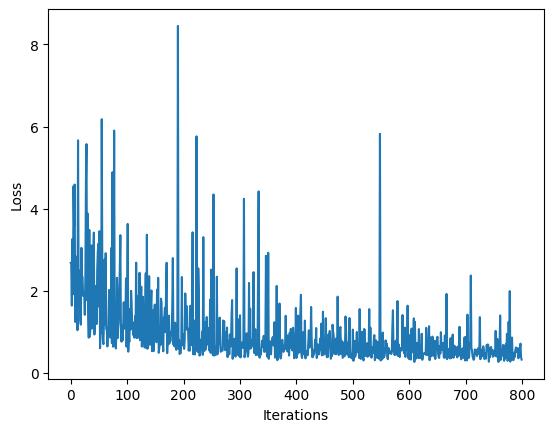

In [11]:
import matplotlib.pyplot as plt
plt.plot(losses1[200:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

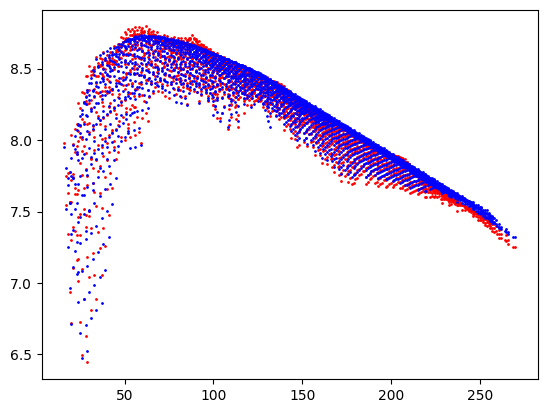

In [8]:
plt.plot(df["A"], np.abs(df["binding_energy"] / df["A"]), "ro", ms=1, label='real data')
plt.plot(df["A"], model1(x_datas).tolist(), "bo", ms=1, label="model")